# Pandas
Pacote útil para importar dados estruturados, geralmente em csv ou tsv. Esse pacote é especialmente utilizado em aplicações de análise financeira, onde em geral é interessante separar os dados por data.

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [75]:
# Lendo um CSV
starbuxStocks = pd.read_csv('sbux.csv')
print(starbuxStocks.head())
print('\n---------------\n', type(starbuxStocks['open']), '\nAcessando uma "Série" de um dataframe')
print('\n---------------\n', type(starbuxStocks[['open']]), '\nAcessando um subdataframe')

         date    open    high     low   close   volume  Name
0  2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX
1  2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX
2  2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX
3  2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX
4  2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX

---------------
 <class 'pandas.core.series.Series'> 
Acessando uma "Série" de um dataframe

---------------
 <class 'pandas.core.frame.DataFrame'> 
Acessando um subdataframe


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')
     open    high     low
0  27.920  28.325  27.920
1  28.260  28.260  27.930
2  28.000  28.275  27.975
3  28.230  28.230  27.750
4  27.765  27.905  27.675


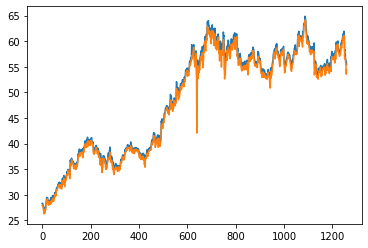

In [15]:
# Extraindo dados das colunas
print(starbuxStocks.columns) # Nome das colunas
print(starbuxStocks[['open', 'high', 'low']].head()) # Extraindo colunas por nome

# Mostrando os dados em um gráfico
plt.plot(starbuxStocks.index, starbuxStocks['high'], starbuxStocks['low'])
plt.show()

In [31]:
# Extraindo dados de linhas
print(starbuxStocks.iloc[10], '\n-------------------')

# É possível extrair dados nomeados
starbuxDatedStocks = pd.read_csv('sbux.csv', index_col='date') # Define a coluna das datas como o índice
starbuxDatedStocks.head()
print(starbuxDatedStocks.loc['2013-03-11'], '\n-----------------')

date      2013-02-25
open            27.2
high          27.355
low             26.6
close         26.605
volume      12333954
Name            SBUX
Name: 10, dtype: object 
-------------------
open         29.2
high       29.465
low        29.165
close      29.305
volume    9897766
Name         SBUX
Name: 2013-03-11, dtype: object 
-----------------


In [35]:
# Convertendo um dataframe em um numpy array [extraindo valores numéricos]
openAndCloses = np.array(starbuxStocks[["open", "close"]].values)
print(openAndCloses)

[[27.92  28.185]
 [28.26  28.07 ]
 [28.    28.13 ]
 ...
 [55.53  54.69 ]
 [53.685 55.61 ]
 [55.08  54.46 ]]


In [37]:
# Escrevendo os dados processados em uma saída
outputDataFrame = starbuxStocks[["date", "open"]]
outputDataFrame.to_csv('output_data.csv')

In [76]:
# Aplicando uma função à cada linha da função.
# row -> linha
def extractYearFromDate(date): 
    year = date.split('-')[0]
    return int(year)

def extractRowYears(row): 
    years = extractYearFromDate(row['date'])
    return years
    
starbuxStocks.apply(extractRowYears, axis = 1) # axis = 1 <- aplica a função a cada linha
totalVolume = starbuxStocks[['volume']].apply(np.sum, axis = 0) # axis = 0 <- aplica a função a cada coluna
print(totalVolume)

volume    11621220414
dtype: int64


# Plotagens específicas do Pandas

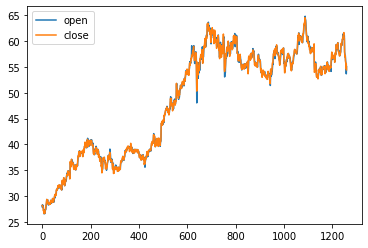

In [85]:
# Dataframe Plot
starbuxStocks[['open', 'close']].plot();

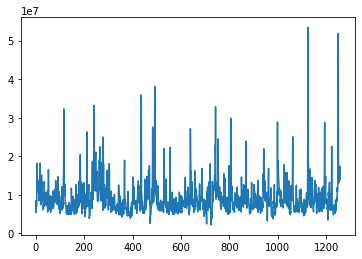

In [86]:
# Series Plot
starbuxStocks['volume'].plot();

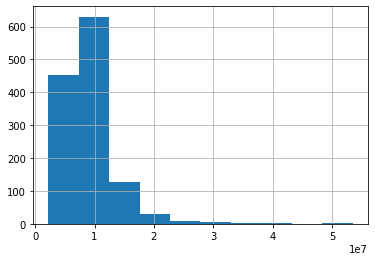

In [87]:
# Histograma de uma Series Plot
starbuxStocks['volume'].hist();

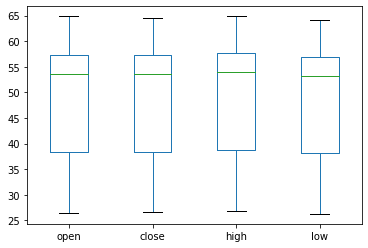

In [88]:
# Box Plot
starbuxStocks[['open', 'close', 'high', 'low']].plot.box();

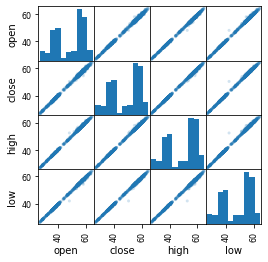

In [90]:
# Scatter Matrix, específico e interessante para verificar a correlação entre as colunas de um dataframe
from pandas.plotting import scatter_matrix

scatter_matrix(starbuxStocks[['open', 'close', 'high', 'low']], alpha = 0.2, figsize=(4,4));